<img src='data/images/lecture-notebook-header.png' />

## Project Team 12

Date: Feb 20, 2024


This text mining project aims to build a reliable system distinguishing human-generated text from Language Model Models (LLMs), particularly OpenAI's GPT-like models. Focused on natural language processing and AI ethics, our objective is to create a machine learning model addressing concerns about misattributed AI-generated content in various areas.

---


## Task 1 - Exploratory Data Analysis

To be developed..

Simple analysis of the data and have a general idea of data distribution, statistics.

1. File read
   - Local file read
3. Text processing
   - Tokenization: Sentences (PunktSentenceTokenizer)
   - Tokenization: Tokens (TreebankWordTokenizer)
   - Stemming (skipped)
   - Part-of-Speech (POS) Tagging
4. Statistics
   - Text size
   - Sentence count
   - Word count
6. Visualization
   - Statistics
   - Wordcloud


## Setting up the Notebook

### Project settings

In [20]:
params = {
    'input_folder': r'data\datasets\bbc\politics',
}

### Import all Required Packages

We use NLTK a spaCy, two very popular and mature Python packages for language processing.


In [21]:
import glob
import os

from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.tokenize import TreebankWordTokenizer
# from nltk.tokenize import TweetTokenizer
# from nltk.tokenize import RegexpTokenizer

from nltk import word_tokenize  # Simplfied notation; it's a wrapper for the TreebankWordTokenizer

from nltk.help import upenn_tagset
from nltk import pos_tag

import spacy
# Load English language model
nlp = spacy.load('en_core_web_sm')

from tqdm import tqdm
from src.plotutil import show_wordcloud

NLTK provides more tokenizers: http://www.nltk.org/api/nltk.tokenize.html

### BBC News Dataset

http://mlg.ucd.ie/datasets/bbc.html 


The dataset is a collection of news articles from the BBC, categorized into various topics, including business, entertainment, politics, sport, and tech. The data consists of 2225 documents collected from the BBC news website of various topics, from 2004 to 2005. The topics are business, entertainment, politics, sports and tech. Each document is stored as a text file. For this project, we would like to focus on the politics documents. The aim is to allow the model to correctly classify the news data in several few topics before generalizing to other topics. t.

In [22]:
docs = []
paths = glob.glob(os.path.join(params['input_folder'], '*'))
for path in paths:
    if os.path.isfile(path):
        with open(path, 'r') as file:
            text = file.read()
            docs.append({
                'path': path,
                'text': text,
            })
print("Number of files from the dataset:", len(docs))

Number of files from the dataset: 417


## Tokenization with NLTK

### Document tokenization into sentences

Split the documents into sentences and not individual tokens.

In [23]:
sentence_tokenizer = PunktSentenceTokenizer()

for doc in docs:
    doc['sentences'] = sentence_tokenizer.tokenize(doc['text'])
    doc['count_sentences'] = len(doc['sentences'])
    
    # print(doc['count_sentences'])

In [24]:
# The first document in a list of sentences
#
for doc in docs:
    doc = docs[0]
    # print(doc)
    print("{0} sentences:".format(doc['count_sentences']))
    for s in doc['sentences']:
        pass  # print('> ', s)
    break

19 sentences:


### Document tokenization into tokens

In the following, we tokenize each sentence individually. This makes the presentation a bit more convenient. In practice, you can tokenize the whole document at once.

In [25]:
print ('\nOutput of split() method:')
for s in docs[0]['sentences']:
    print (s.split(' '))
    #print(s.split()) # This is also fine since whitespace is the default separator
    break


Output of split() method:
['Labour', 'plans', 'maternity', 'pay', 'rise\n\nMaternity', 'pay', 'for', 'new', 'mothers', 'is', 'to', 'rise', 'by', 'Â£1,400', 'as', 'part', 'of', 'new', 'proposals', 'announced', 'by', 'the', 'Trade', 'and', 'Industry', 'Secretary', 'Patricia', 'Hewitt.']


The limitation of this approach is obvious, since many tokens are not separated by a whitespace. Most commonly this is the case for punctuation marks.

#### TreebankWordTokenizer

The `TreebankWordTokenizer` is a tokenizer available in the Natural Language Toolkit (NLTK) library for Python. It is specifically designed to tokenize text according to the conventions of the Penn Treebank. The Penn Treebank is a widely used corpus of annotated English text that has been extensively used in natural language processing research.

The `TreebankWordTokenizer` tokenizes text by following the rules and conventions defined in the Penn Treebank. It splits text into words and punctuation marks while considering specific cases such as contractions, hyphenated words, and punctuation attached to words. It is the default tokenizer of NLTK. This tokenizer is commonly used for tasks that rely on the Penn Treebank tokenization conventions, such as training and evaluating language models, part-of-speech tagging, syntactic parsing, and other NLP tasks that benefit from consistent tokenization based on the Penn Treebank guidelines.

In [26]:
treebank_tokenizer = TreebankWordTokenizer()

print ('\nOutput of TreebankWordTokenizer:')
for s in docs[0]['sentences']:
    print (treebank_tokenizer.tokenize(s))
    break

print ('\nOutput of the word_tokenize() method:')
for s in docs[0]['sentences']:
    print (word_tokenize(s))
    break


Output of TreebankWordTokenizer:
['Labour', 'plans', 'maternity', 'pay', 'rise', 'Maternity', 'pay', 'for', 'new', 'mothers', 'is', 'to', 'rise', 'by', 'Â£1,400', 'as', 'part', 'of', 'new', 'proposals', 'announced', 'by', 'the', 'Trade', 'and', 'Industry', 'Secretary', 'Patricia', 'Hewitt', '.']

Output of the word_tokenize() method:
['Labour', 'plans', 'maternity', 'pay', 'rise', 'Maternity', 'pay', 'for', 'new', 'mothers', 'is', 'to', 'rise', 'by', 'Â£1,400', 'as', 'part', 'of', 'new', 'proposals', 'announced', 'by', 'the', 'Trade', 'and', 'Industry', 'Secretary', 'Patricia', 'Hewitt', '.']


In [27]:
for doc in docs:
    doc['tokens'] = []
    for s in doc['sentences']:
        doc['tokens'] += word_tokenize(s)
    doc['count_tokens'] = len(doc['tokens'])
    break

print("docs[0]: {0} tokens".format(docs[0]['count_tokens']))
print(docs[0]['tokens'])

docs[0]: 511 tokens
['Labour', 'plans', 'maternity', 'pay', 'rise', 'Maternity', 'pay', 'for', 'new', 'mothers', 'is', 'to', 'rise', 'by', 'Â£1,400', 'as', 'part', 'of', 'new', 'proposals', 'announced', 'by', 'the', 'Trade', 'and', 'Industry', 'Secretary', 'Patricia', 'Hewitt', '.', 'It', 'would', 'mean', 'paid', 'leave', 'would', 'be', 'increased', 'to', 'nine', 'months', 'by', '2007', ',', 'Ms', 'Hewitt', 'told', 'GMTV', "'s", 'Sunday', 'programme', '.', 'Other', 'plans', 'include', 'letting', 'maternity', 'pay', 'be', 'given', 'to', 'fathers', 'and', 'extending', 'rights', 'to', 'parents', 'of', 'older', 'children', '.', 'The', 'Tories', 'dismissed', 'the', 'maternity', 'pay', 'plan', 'as', '``', 'desperate', "''", ',', 'while', 'the', 'Liberal', 'Democrats', 'said', 'it', 'was', 'misdirected', '.', 'Ms', 'Hewitt', 'said', ':', '``', 'We', 'have', 'already', 'doubled', 'the', 'length', 'of', 'maternity', 'pay', ',', 'it', 'was', '13', 'weeks', 'when', 'we', 'were', 'elected', ',', '

# Part-of-Speech (POS) Tagging

The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging, POS tagging, or simply tagging. Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset. Our emphasis in this chapter is on exploiting tags, and tagging text automatically.

Knowing the POS tags for words in a text is very useful or even crucial for many downstream tasks:
* Lemmatization (select correct lemma given a word and its POS tag)
* Word Disambiguation ("I saw a bear." vs "Bear with me!")
* Named Entity Recognition (typically comprised of nouns and proper nouns)
* Information Extractions (e.g., verbs indicate relations between entities)
* Parsing (information of word classes useful before creating parse trees)
* Speech synthesis/recognition (e.g., noun "DIScount" vs. verb "disCOUNT")
* Authorship Attribution (e.g., relative frequencies of nouns, verbs, adjectives, etc.)
* Machine Translation (e.g., reordering of adjectives and nouns)

In [28]:
upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## POS Tagging with NLTK

### Definition of Tokenizer

For any kind of more formal text, the default tokenizer will work just fine. Even here, the default tokenizer would suffice since the important token (i.e., the "real" words) are handled correctly.

In [29]:
key_tokens = 'tokens'
key_pos_tags = 'pos_tags'

print ('\nOutput of NLTK POS tagger:')
for doc in docs:
    doc[key_tokens] = []
    doc[key_pos_tags] = []
    for s in doc['sentences']:
        tokens = word_tokenize(s)
        pos_tags = pos_tag(tokens)
        doc[key_tokens] += tokens 
        doc[key_pos_tags] += pos_tags
        # print ('\n', pos_tags)
        # break
    doc['count_tokens'] = len(doc[key_tokens])
    print('.', end='', flush=True)


Output of NLTK POS tagger:
.................................................................................................................................................................................................................................................................................................................................................................................................................................

## POS Tagging with spaCy

Similar to lemmatization, spaCy performs POS tagging by default. This means that any time you analyze a document -- and do not explicitly turn off the POS tagger -- spaCy will assign each token its corresponding POS tag. This makes POS tagging very easy and quick in terms of the required code. Let's use spaCy to perform POS tagging on our example document below. The code below ensures that the output is similar in structure compared to the one from NLTK to allow for an easy comparison.


In [30]:
key_tokens = 'tokens_'
key_pos_tags = 'pos_tags_'

print ('\nOutput of spaCy POS tagger:')
for doc in docs:
    doc[key_tokens] = []
    doc[key_pos_tags] = []
    for s in doc['sentences']:
        d = nlp(s)  # d is an object, not just a simple list
        # Let's create a list so the output matches the previous ones
        token_list = []
        for token in d:
            token_list.append((token.text, token.tag_)) # token is also an object, not a string
        print ('\n', token_list)
        doc[key_tokens] += token_list
        break
    break


Output of spaCy POS tagger:

 [('Labour', 'NN'), ('plans', 'VBZ'), ('maternity', 'NN'), ('pay', 'NN'), ('rise', 'NN'), ('\n\n', '_SP'), ('Maternity', 'NN'), ('pay', 'NN'), ('for', 'IN'), ('new', 'JJ'), ('mothers', 'NNS'), ('is', 'VBZ'), ('to', 'TO'), ('rise', 'VB'), ('by', 'IN'), ('Â£1,400', 'NNP'), ('as', 'IN'), ('part', 'NN'), ('of', 'IN'), ('new', 'JJ'), ('proposals', 'NNS'), ('announced', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('Trade', 'NNP'), ('and', 'CC'), ('Industry', 'NNP'), ('Secretary', 'NNP'), ('Patricia', 'NNP'), ('Hewitt', 'NNP'), ('.', '.')]


### Review analysis

For each document, we perform the following steps:
- Tokenize sentences and POS tag all tokens
- Check each token if it is an adjective
- If a token is an adjective, increase a counter for this adjective

In [39]:
# This dictionary will keep track of the count for each type of tags
frequencies = {
    'adjective': {},
    'noun': {},
}

# Check each sentence one by one
for doc in tqdm(docs):
    sentences = doc['sentences']
    for sentence in sentences:
        # Tokenize the sentence
        token_list = word_tokenize(sentence)
        # POS tag all words/tokens
        pos_tag_list = pos_tag(token_list)
        # Count the number of all adjectives
        for token, tag in pos_tag_list:
            t0 = tag[0].lower()
            if t0 == 'j':
                tag_class = 'adjective'
            elif t0 == 'n':
                tag_class = 'noun'
            else:
                continue
            # Convert token to lowercase, otherwise "Good" and "good" are considered differently
            token = token.lower()
            if token not in frequencies[tag_class]:
                frequencies[tag_class][token] = 1.0
            else:
                frequencies[tag_class][token] += 1.0
    # break

print(frequencies['noun'])

100%|████████████████████████████████████████████████████████████████████████████████| 417/417 [00:19<00:00, 21.84it/s]

{'labour': 699.0, 'maternity': 19.0, 'pay': 41.0, 'rise': 31.0, 'mothers': 6.0, 'â£1,400': 2.0, 'part': 150.0, 'proposals': 81.0, 'trade': 43.0, 'industry': 38.0, 'secretary': 266.0, 'patricia': 5.0, 'hewitt': 14.0, 'leave': 8.0, 'months': 83.0, 'ms': 95.0, 'gmtv': 2.0, 'sunday': 51.0, 'programme': 89.0, 'plans': 284.0, 'fathers': 11.0, 'rights': 145.0, 'parents': 54.0, 'children': 115.0, 'tories': 243.0, 'plan': 86.0, 'liberal': 107.0, 'democrats': 95.0, 'length': 4.0, 'weeks': 44.0, 'aim': 18.0, 'end': 49.0, 'parliament': 108.0, 'women': 83.0, 'commitment': 14.0, 'ministers': 131.0, 'partner': 8.0, 'period': 25.0, 'carers': 11.0, 'shadow': 53.0, 'state': 69.0, 'family': 48.0, 'theresa': 6.0, 'may': 69.0, 'gordon': 107.0, 'brown': 383.0, 'pre-budget': 2.0, 'review': 30.0, 'december': 16.0, 'tony': 195.0, 'blair': 571.0, 'bid': 24.0, 'voters': 123.0, 'conservatives': 106.0, 'general': 49.0, 'election': 565.0, 'democrat': 64.0, 'spokeswoman': 26.0, 'sandra': 5.0, 'gidley': 1.0, 'money':

In [40]:
tag_class = 'adjective'

# "Good" adjectives
print(frequencies[tag_class]['great'])
print(frequencies[tag_class]['amazing'])
print(frequencies[tag_class]['excellent'])
print()
# "Bad" adjectives
print(frequencies[tag_class]['disappointed'])
print(frequencies[tag_class]['expensive'])
print(frequencies[tag_class]['sad'])

61.0
1.0
4.0

2.0
8.0
3.0


With `frequencies`, we now have a dictionary where the keys are the adjectives/nouns and the values represent how often they occured in all sentences. Let's have a look at a couple of examples.

### Visualization of results

While the dictionary `adjective_frequencies` contains all the important information, it's not a very convenient representation / visualization to show to a user looking for some kind of summary for a restaurant. However, the information about word frequencies (here: adjectives) lends itself to use a word cloud for visualization.

We use a readily available Python package ([`wordcloud`](https://anaconda.org/conda-forge/wordcloud)) for convenience. We also provide an auxiliary method `show_wordcloud()` that generates a word cloud given a dictionary of word frequencies. Feel free to have a look at the method's implementation in `utils.plotutil`.


adjective


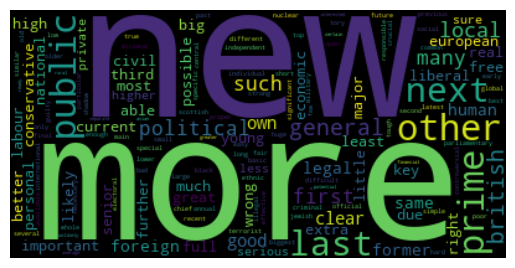

noun


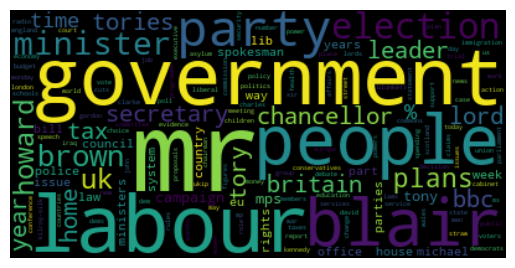

In [44]:
for tag_class, freq in frequencies.items():
    print(tag_class)
    show_wordcloud(freq)